In [114]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statistics import *
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline
# Important packages for the project.
from itertools import chain
from sklearn import preprocessing, ensemble 
from sklearn.preprocessing import StandardScaler # Standardisation function from scikit-learn
from sklearn.neighbors import LocalOutlierFactor # LocalOutlierFactor function from the scikit-learn
from numpy import array
from sklearn.model_selection import KFold # KFold Cross-validation function from scikit-learn model selection
from sklearn.metrics import accuracy_score # Accuracy score to compute accuracy metric from scikit-learn 
from sklearn.linear_model import LogisticRegression # logistic regression model from scikit-learn 
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier model from scikit-learn
from sklearn.svm import SVC # Support Vector Machine classifier model from scikit-learn
from sklearn.ensemble import AdaBoostClassifier # AdaBoost classifier model from scikit-learn
from sklearn.ensemble import BaggingClassifier # Bagging classifier model from scikit-learn
from sklearn.ensemble import RandomForestClassifier # Random forest classifier model from scikit-learn
from sklearn.preprocessing import LabelEncoder # Encoding categorical variable into numerical variable
from sklearn.model_selection import train_test_split # random Train test split from scikit-learn 
from sklearn.metrics import classification_report # classification report from scikit-learn
from sklearn.metrics import confusion_matrix # confusion matrix between prediction and true value from scikit learn
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
os.chdir(os.getcwd())
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

The data is a subset of the DeepSolar database, a solar installation database for the US, built by extracting information
from satellite images. Photovoltaic panel installations are identified from over one billion image tiles covering all urban
areas as well as locations in the US by means of an advanced machine learning framework. Each image tile records the
amount of solar panel systems (in terms of panel surface and number of solar panels) and is complemented with features
describing social, economic, environmental, geographical, and meteorological aspects. As such, the database can be
employed to relate key environmental, weather and socioeconomic factors with the adoption of solar photovoltaics
energy production.

The dataset data_project_deepsolar.csv contains a subset of the DeepSolar database. Each row of the dataset is
a “tile” of interest, that is an area corresponding to a detected solar power system, constituted by a set of solar panels
on top of a building or at a single location such as a solar farm. For each system, a collection of features record social,
economic, environmental, geographical, and meteorological aspects of the tile (area) in which the system has been
detected. Information about the features are in the file data_project_deepsolar_info.csv.

## Data cleaning and feature engineering

In [70]:
# load the datasets 
Deepsolardata = #Write your code here 
Deepsolardata_meta = #Write your code here 

### Analyse Information about the dataset 

In [158]:
Deepsolardata_meta

,column_name,explanation,source
0,solar_system_count,low (less than 10) or high solar power system ...,deepsolar
1,state,state name,ACS 2015 (5-Year Estimates)
2,average_household_income,average annual houshold income ($),ACS 2015 (5-Year Estimates)
3,employed,number of employed people,ACS 2015 (5-Year Estimates)
4,gini_index,gini index,ACS 2015 (5-Year Estimates)
5,land_area,total land area (mile^2),ACS 2015 (5-Year Estimates)
6,per_capita_income,per capita annual income ($),ACS 2015 (5-Year Estimates)
7,population,total population,ACS 2015 (5-Year Estimates)
8,population_density,population density (/mile^2),ACS 2015 (5-Year Estimates)
9,total_area,total area (mile^2),ACS 2015 (5-Year Estimates)


### Information about the structure of dataset

In [77]:
Deepsolardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 81 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   solar_system_count                       20736 non-null  object 
 1   state                                    20736 non-null  object 
 2   average_household_income                 20736 non-null  float64
 3   employed                                 20736 non-null  int64  
 4   gini_index                               20736 non-null  float64
 5   land_area                                20736 non-null  float64
 6   per_capita_income                        20736 non-null  int64  
 7   population                               20736 non-null  int64  
 8   population_density                       20736 non-null  float64
 9   total_area                               20736 non-null  float64
 10  unemployed                               20736

### check for the null values in dataset

In [76]:
#Write your code here

solar_system_count                         0
state                                      0
average_household_income                   0
employed                                   0
gini_index                                 0
land_area                                  0
per_capita_income                          0
population                                 0
population_density                         0
total_area                                 0
unemployed                                 0
water_area                                 0
education_less_than_high_school_rate       0
education_high_school_graduate_rate        0
education_college_rate                     0
education_bachelor_rate                    0
education_master_rate                      0
education_professional_school_rate         0
education_doctoral_rate                    0
race_white_rate                            0
race_black_africa_rate                     0
race_indian_alaska_rate                    0
race_asian

In [78]:
# Split the predictor features and target feature
X=#Put your code here
Y=#Put your code here

### Stastistical behavior of predictor features

In [79]:
# Take out numerical parameters from the X predictor features 
numerics = ['int64', 'float64']
X_numeric = X.select_dtypes(include=numerics)
X_numeric_stats=X_numeric.describe()
X_numeric_stats

,average_household_income,employed,gini_index,land_area,per_capita_income,population,population_density,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_other_rate,heating_fuel_none_rate,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_median_value,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_years_of_education,diversity
count,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,2.073600e+04,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000
mean,81945.416302,2173.082996,0.420833,19.941171,30767.667535,4712.628183,7746.720931,20.299584,205.652488,0.358413,0.159864,0.245714,0.287068,0.189836,0.082416,0.021466,0.013636,0.691964,0.102330,0.006935,0.082053,0.001742,0.081908,0.033067,0.909116,0.125482,0.647093,0.275553,0.044851,0.011101,0.003765,0.016700,15.242038,12.738124,8.706924,9.036585,12.834615,735.708623,6534.266590,160107.558931,167377.534144,1650.600984,2.851026,1826.529466,3.090635e+05,345.269531,-1.332448,29.642252,18.341033,44.058063,14.528111,0.585911,4.538377,97.636010,4.270404,15.520602,1997.276910,2425.142843,0.061734,0.044349,0.023268,0.067075,0.229979,0.116324,0.096500,0.028862,0.113332,0.051415,0.096578,0.018867,0.092298,0.554718,0.397968,0.557896,0.424892,13.504433,0.380176
std,42414.499801,1062.697652,0.060991,152.482632,17140.759273,2167.401666,12333.540070,153.174909,133.715847,3.037931,0.136365,0.097180,0.083567,0.106952,0.065465,0.028070,0.020101,0.235927,0.176826,0.031803,0.122361,0.006882,0.110880,0.026519,0.052012,0.113848,0.238133,0.235716,0.125881,0.038216,0.010459,0.040560,2.568417,3.166127,2.866135,2.399418,2.877631,233.738135,836.274651,179655.238573,179776.819771,731.951719,0.611507,811.976113,2.577513e+05,

In [80]:
# shape of reduced numerical features
X_numeric.shape

(20736, 77)

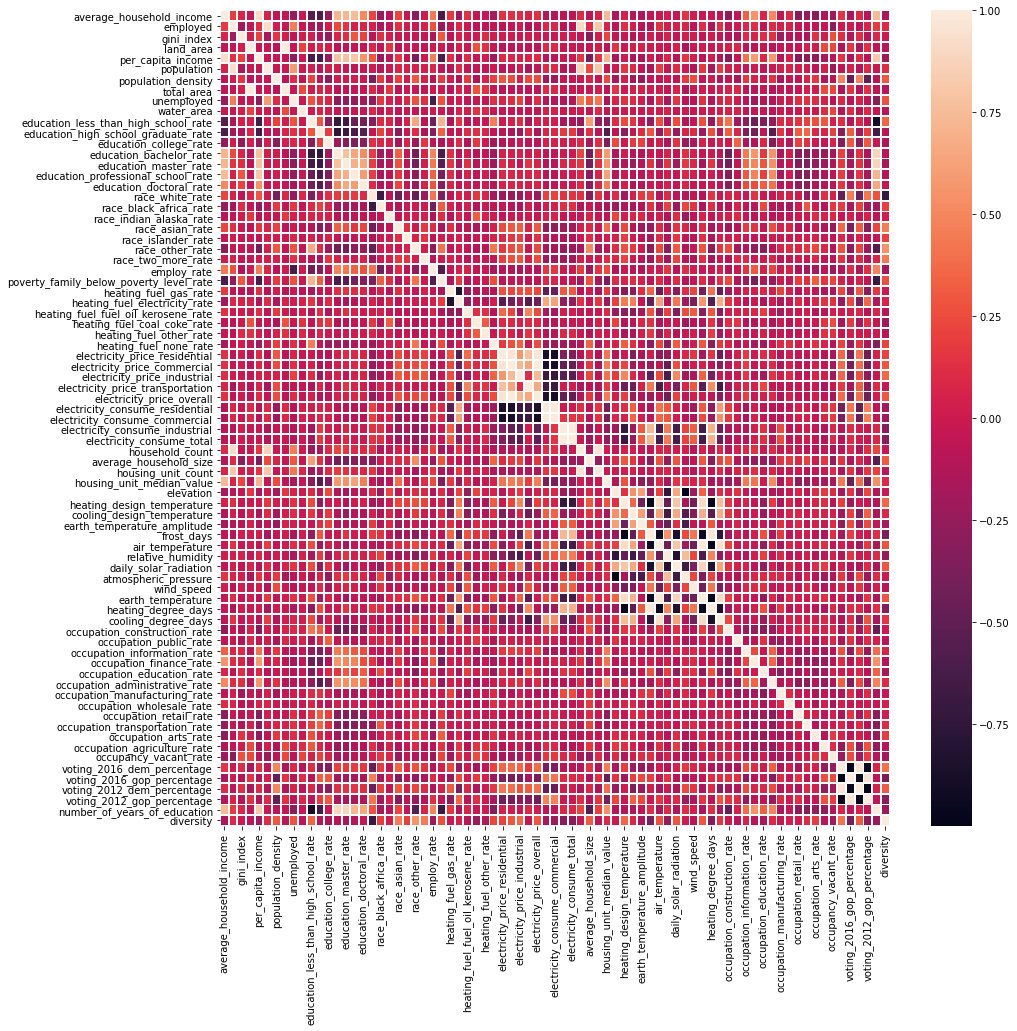

In [82]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
#write your code here

## Feature engineering and data cleaning

In [83]:
# Remove highly correlated predictor variables from the numerical X features and take out the significant features for the classification
# Create correlation matrix
X_Significant = pd.DataFrame(X_numeric)
corr_matrix = X_Significant.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['total_area', 'electricity_price_commercial', 'electricity_price_overall', 'electricity_consume_commercial', 'electricity_consume_total', 'housing_unit_count', 'frost_days', 'atmospheric_pressure', 'earth_temperature', 'heating_degree_days', 'voting_2016_gop_percentage', 'voting_2012_dem_percentage', 'voting_2012_gop_percentage']


### Select significant variables by removing one set of higly correlated variables from thr predictor features

In [90]:
# Drop highly correlated features
X_Significant #write your code here

(20736, 64)

### Locate outliers

In [91]:
# Locate the outliers in significant 
lof = #write your code here 
yhat = #write your code here

In [92]:
# Shape of non outlier rows
mask = yhat != -1
mask.shape

(20736,)

### Converting non-standardised numerical data points to standardised data

In [93]:
# Standardise the significant features data points
mm_scaler = #Write your code here
X_Standardised= mm_scaler.fit_transform(X_Significant.values)

In [96]:
# Creating standardised dataset 
X_Standardised=pd.DataFrame(X_Standardised,columns=X_Significant.columns)
X_Standardised.shape

(20736, 64)

### Converting object type features into categorical features

In [97]:
# Converting object type features into categorical features
X["state"] = #Write your code here
Y=#Write your code here

In [100]:
# creating dataset for target variable
Y=pd.DataFrame(Y,columns=['solar_system_count'])

In [ ]:
### Encoding labels of categorical features into numerical codes

In [102]:
# creating instance of labelencoder
labelencoder = #Write your code here
# Assigning numerical values and storing in another column
Y['solar_system_count_encoded'] = #Write your code here
# Encoded target feature
YEncoded=Y.solar_system_count_encoded.values

In [103]:
# encoded state feature of predictor feature
X_Standardised['state']=labelencoder.fit_transform(X["state"])

### Split the data into train and test set

In [109]:
# splitting training and testing predictor and target features
X_train, X_Test, y_train, y_Test = #Write your code here

## Logistic regression model training 

In [164]:
# Logistic regression model instance
logmodel = #Write your code here
logmodel.fit(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-164-2ac4cd6a53bf>, line 2)

In [112]:
# Predicted target features
predictions = #Write your code here

### Model performance

Classification Report

In [115]:
print(classification_report(y_Test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2156
           1       0.88      0.88      0.88      1992

    accuracy                           0.88      4148
   macro avg       0.88      0.88      0.88      4148
weighted avg       0.88      0.88      0.88      4148



True positive, true nigative, false positive (type-1 error), false negative (type-2 error)

In [116]:
tn, fp, fn, tp = confusion_matrix(y_Test,predictions).ravel()
tn, fp, fn, tp

(1906, 250, 230, 1762)

## Best Model selection and optimisation of performance

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. We use k-fold as the cross-validation of different models over training and validation splits, then analyse the generalised performance over test split. This method provides us to establish the best model for the respective data and also help us to determine the number of counts of any selected best model over different random samples of respective data. It helps us to understand the real-time generalised performance of the model in the production pipeline.

In [152]:
# Sample from the given dataset
XData = X_Standardised.iloc[:15000,::].values
X_test=X_Standardised.iloc[15000:17000,::].values
YData=YEncoded[:15000]
Y_test=YEncoded[15000:17000]

# prepare cross validation
acc={'RF': [], 'LR': [],'CT':[],'SVM':[],'ADA':[],'BAG':[]} # dict to record validation accuracy 
score = {'RF GA': [], 'LR GA': [], 'CT GA':[],'SVM GA':[],'ADA GA':[],'BAG GA':[]} #dict to record genralisation accuracy score

df_best_model=pd.DataFrame()
# enumerate splits
folds=range(2,10) #range of folds
for k in folds:
    kfold = #Write your code here #k-fold instance
    for train, val in #Write your code here:
        X_train,X_val=XData[train],XData[val] #K-fold split X data
        Y_train,Y_val=YData[train], YData[val] #K-fold split Y data
        # logistic regression classifcation object  
        logmodel = LogisticRegression(max_iter=10000)
        logmodel.fit(X_train,Y_train) #logistic regression fit 
        # predict target feautures over validation split
        val_predictions = logmodel.predict(X_val)
        #confusion matrix for logistic model
        tn, fp, fn, tp = confusion_matrix(Y_val,val_predictions).ravel()
        #calculating accuracy over validation split
        logacc=((tn+tp)/(fn+fp+tp+tn))
        acc['LR'].insert(0,logacc)
        # Random forest classification object
        rfmodel = RandomForestClassifier(random_state=1)
        rfmodel.fit(X_train, Y_train) #Random forest model fit
        # evaluate model 
        rfprediction = rfmodel.predict(X_val)
        rtn, rfp, rfn, rtp = confusion_matrix(Y_val,rfprediction).ravel()
        #calculating accuracy over validation split
        rfacc=((rtn+rtp)/(rfn+rfp+rtp+rtn))
        acc['RF'].insert(0,rfacc)
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,Y_train)
        #Predict the response for validation dataset
        clf_prediction = clf.predict(X_val)
        clftn, clffp, clffn, clftp = confusion_matrix(Y_val,clf_prediction).ravel()
        #calculating validation accuracy
        clfacc=((clftn+clftp)/(clffn+clffp+clftp+clftn))
        acc['CT'].insert(0,clfacc)
        #Create a svm Classifier
        SVM = SVC(kernel='linear') # Linear Kernel
        #Train the model using the training sets
        SVM.fit(X_train, Y_train)
        #Predict the response for test dataset
        SVM_prediction = SVM.predict(X_val)
        svmtn, svmfp, svmfn, svmtp = confusion_matrix(Y_val,SVM_prediction).ravel()
        #calculating validation accuracy
        svmacc=((svmtn+svmtp)/(svmfn+svmfp+svmtp+svmtn))
        acc['SVM'].insert(0,svmacc)
        #AdaBoost classifier object 
        AdaBoost = AdaBoostClassifier(n_estimators=10, random_state=0).fit(X_train, Y_train)
        #Predict the response for test dataset
        AdaBoost_prediction = AdaBoost.predict(X_val)
        adatn, adafp, adafn, adatp = confusion_matrix(Y_val,AdaBoost_prediction).ravel()
        #calculating validation accuracy 
        adaacc=((adatn+adatp)/(adafn+adafp+adatp+adatn))
        acc['ADA'].insert(0,adaacc)
        #Bagging classifier object 
        bag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, Y_train)
        bag_prediction=bag.predict(X_val)
        bagtn, bagfp, bagfn, bagtp = confusion_matrix(Y_val,bag_prediction).ravel()
        #Calculating validation accuracy
        bagacc=((bagtn+bagtp)/(bagtn+bagfp+bagfn+bagtp))
        acc['BAG'].insert(0,bagacc)
        Keymax = # Write your code here 
        
        # Selected model Generalised performance 
        # Condition of Best classifier = Random forest
        if # Write your code here :
            rfgeneralprediction = rfmodel.predict(X_test)
            grtn, grfp, grfn, grtp = confusion_matrix(Y_test,rfgeneralprediction).ravel()
            rfgenralisation=((grtn+grtp)/(grfn+grfp+grtp+grtn))
            score['RF GA'].append(rfgenralisation)
        # Condition of Best classifier = Logistic Regression 
        elif #Write your code here:
            general_predictions = logmodel.predict(X_test)
            gtn, gfp, gfn, gtp = confusion_matrix(Y_test,general_predictions).ravel()
            general_logacc=((gtn+gtp)/(gfn+gfp+gtp+gtn))
            score['LR GA'].append(general_logacc)
        #Condition of Best classifire = Classification tree
        elif #Write your code here:
            ctgeneral_predictions = clf.predict(X_test)
            cttn, ctfp, ctfn, cttp = confusion_matrix(Y_test,ctgeneral_predictions).ravel()
            general_ctacc=((cttn+cttp)/(ctfn+ctfp+cttp+cttn))
            score['CT GA'].append(general_ctacc)
        #Condition of Best Classifier = Support Vector Machine
        elif #write your code here:
            svmgeneral_predictions = SVM.predict(X_test)
            svmgtn, svmgfp, svmgfn, svmgtp = confusion_matrix(Y_test,svmgeneral_predictions).ravel()
            general_svmacc=((svmgtn+svmgtp)/(svmgfn+svmgfp+svmgtp+svmgtn))
            score['SVM GA'].append(general_svmacc)
        #Condition of Best Classifier = AdaBoost
        elif #Write your code here:
            adageneral_predictions = AdaBoost.predict(X_test)
            adagtn, adagfp, adagfn, adagtp = confusion_matrix(Y_test,adageneral_predictions).ravel()
            general_adaacc=((adagtn+adagtp)/(adagfn+adagfp+adagtp+adagtn))
            score['ADA GA'].append(general_adaacc)
        #Condition of Best Classifier = Bagging model
        elif #Write your code here:
            baggeneral_predictions = bag.predict(X_test)
            baggtn, baggfp, baggfn, baggtp = confusion_matrix(Y_test,baggeneral_predictions).ravel()
            general_bagacc=((baggtn+baggtp)/(baggfn+baggfp+baggtp+baggtn))
            score['BAG GA'].append(general_bagacc)
#creating datasets of recorded generalised performance of selected best classifier in each fold
df  = pd.DataFrame([score.values()], columns=score.keys())
df_best_model = pd.concat([df_best_model, df], axis =1)
#creating dataset of recorded validation accuracy of classifiers in each fold
df_val  = pd.DataFrame([acc.values()], columns=acc.keys())
print('Process completed')

Process completed


### Performance analysis of k-fold cv models

Text(0.5, 1.0, 'Bagging validation accuracy')

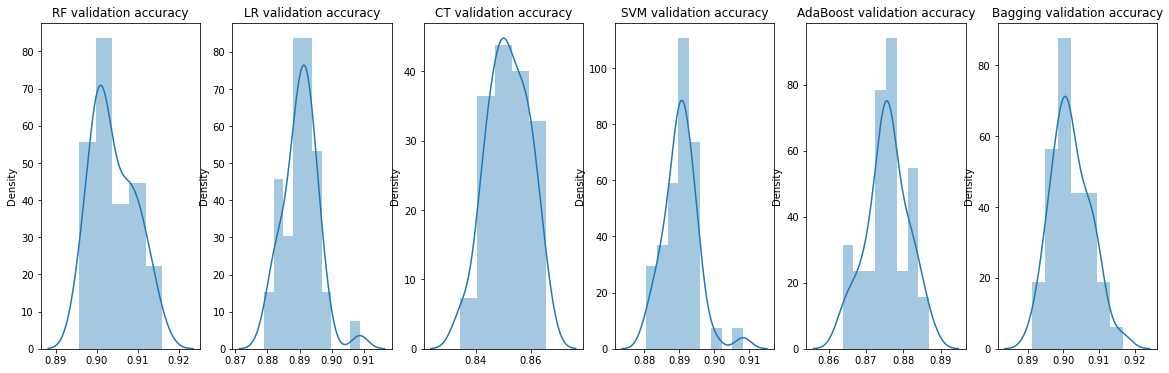

In [153]:
#Plot for validation accuracy
fig, axs = plt.subplots(ncols=6,figsize=(20,6))
sns.distplot(df_val.iloc[0,0],hist=True, kde=True, ax=axs[0]).set_title('RF validation accuracy')
sns.distplot(df_val.iloc[0,1], ax=axs[1]).set_title('LR validation accuracy')
sns.distplot(df_val.iloc[0,2], ax=axs[2]).set_title('CT validation accuracy')
sns.distplot(df_val.iloc[0,3], ax=axs[3]).set_title('SVM validation accuracy')
sns.distplot(df_val.iloc[0,4], ax=axs[4]).set_title('AdaBoost validation accuracy')
sns.distplot(df_val.iloc[0,5], ax=axs[5]).set_title('Bagging validation accuracy')

In [154]:
print('Best classifier count')
print('RF selection count',len(df_best_model.iloc[0,0]))
print('LR selection connt',len(df_best_model.iloc[0,1]))
print('CT selection connt',len(df_best_model.iloc[0,2]))
print('SVM selection connt',len(df_best_model.iloc[0,3]))
print('AdaBoost selection connt',len(df_best_model.iloc[0,4]))
print('Bagging selection connt',len(df_best_model.iloc[0,5]))

Best classifier count
RF selection count 31
LR selection connt 0
CT selection connt 0
SVM selection connt 0
AdaBoost selection connt 0
Bagging selection connt 13


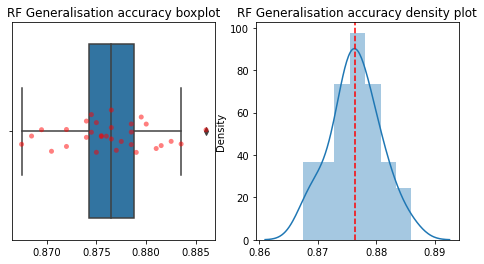

In [155]:
fig, axs = plt.subplots(ncols=2,figsize=(8,4))
sns.boxplot(df_best_model.iloc[0,0], ax=axs[0]).set_title('RF Generalisation accuracy boxplot')
sns.stripplot(df_best_model.iloc[0,0], 
                   jitter=True,
                   dodge=True, 
                   marker='o', 
                   alpha=0.5,
                   color='red',ax=axs[0])
sns.distplot(df_best_model.iloc[0,0], ax=axs[1]).set_title('RF Generalisation accuracy density plot')
plt.axvline(mean(df_best_model.iloc[0,0]), linestyle="--",color='red')
plt.show()

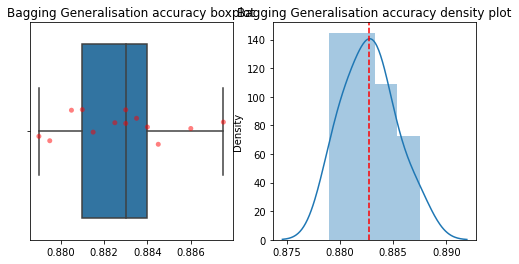

In [156]:
fig, axs = plt.subplots(ncols=2,figsize=(8,4))
sns.boxplot(df_best_model.iloc[0,5], ax=axs[0]).set_title("Bagging Generalisation accuracy boxplot")
sns.stripplot(df_best_model.iloc[0,5], 
                   jitter=True,
                   dodge=True, 
                   marker='o', 
                   alpha=0.5,
                   color='red',ax=axs[0])
sns.distplot(df_best_model.iloc[0,5], ax=axs[1]).set_title('Bagging Generalisation accuracy density plot')
plt.axvline(mean(df_best_model.iloc[0,5]), linestyle="--",color='red')
plt.show()